# Project 3 : Prediction task is to determine whether a person makes over 50K a year.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows = 1,header = None)

In [3]:
train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational_num','marital_status', 'occupation', 'relationship', 'race', 'gender','capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income']
train.columns = column_names
test.columns = column_names

In [5]:
train.head(5)

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test.head(5)

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          32561 non-null object
fnlwgt             32561 non-null int64
education          32561 non-null object
educational_num    32561 non-null int64
marital_status     32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
gender             32561 non-null object
capital_gain       32561 non-null int64
capital_loss       32561 non-null int64
hours_per_week     32561 non-null int64
native_country     32561 non-null object
income             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age                16281 non-null int64
workclass          16281 non-null object
fnlwgt             16281 non-null int64
education          16281 non-null object
educational_num    16281 non-null int64
marital_status     16281 non-null object
occupation         16281 non-null object
relationship       16281 non-null object
race               16281 non-null object
gender             16281 non-null object
capital_gain       16281 non-null int64
capital_loss       16281 non-null int64
hours_per_week     16281 non-null int64
native_country     16281 non-null object
income             16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [9]:
print(train.describe())
print('*'*100)
print(test.describe())

                age        fnlwgt  educational_num  capital_gain  \
count  32561.000000  3.256100e+04     32561.000000  32561.000000   
mean      38.581647  1.897784e+05        10.080679   1077.648844   
std       13.640433  1.055500e+05         2.572720   7385.292085   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.178270e+05         9.000000      0.000000   
50%       37.000000  1.783560e+05        10.000000      0.000000   
75%       48.000000  2.370510e+05        12.000000      0.000000   
max       90.000000  1.484705e+06        16.000000  99999.000000   

       capital_loss  hours_per_week  
count  32561.000000    32561.000000  
mean      87.303830       40.437456  
std      402.960219       12.347429  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  
*********************************************

From the primary data analysis, we can note that there are both numeric and object variables and there are ? values

In [10]:
train = train.replace(' ?',np.nan)
test = test.replace(' ?',np.nan)

In [11]:
print(train.isna().sum())
print('*'*100)
print(test.isna().sum())

age                   0
workclass          1836
fnlwgt                0
education             0
educational_num       0
marital_status        0
occupation         1843
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      583
income                0
dtype: int64
****************************************************************************************************
age                  0
workclass          963
fnlwgt               0
education            0
educational_num      0
marital_status       0
occupation         966
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     274
income               0
dtype: int64


In [12]:
# As there are large number of null values we will drop the null values
train = train.dropna()
test = test.dropna()

In [13]:
dataset = pd.concat([train,test],axis=0)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null object
fnlwgt             45222 non-null int64
education          45222 non-null object
educational_num    45222 non-null int64
marital_status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital_gain       45222 non-null int64
capital_loss       45222 non-null int64
hours_per_week     45222 non-null int64
native_country     45222 non-null object
income             45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [15]:
dataset.income.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [16]:
dataset['income'] = dataset.income.replace({' <=50K':' <=50K', ' >50K':' >50K', ' <=50K.':' <=50K', ' >50K.':' >50K'})

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null object
fnlwgt             45222 non-null int64
education          45222 non-null object
educational_num    45222 non-null int64
marital_status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital_gain       45222 non-null int64
capital_loss       45222 non-null int64
hours_per_week     45222 non-null int64
native_country     45222 non-null object
income             45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


# EDA

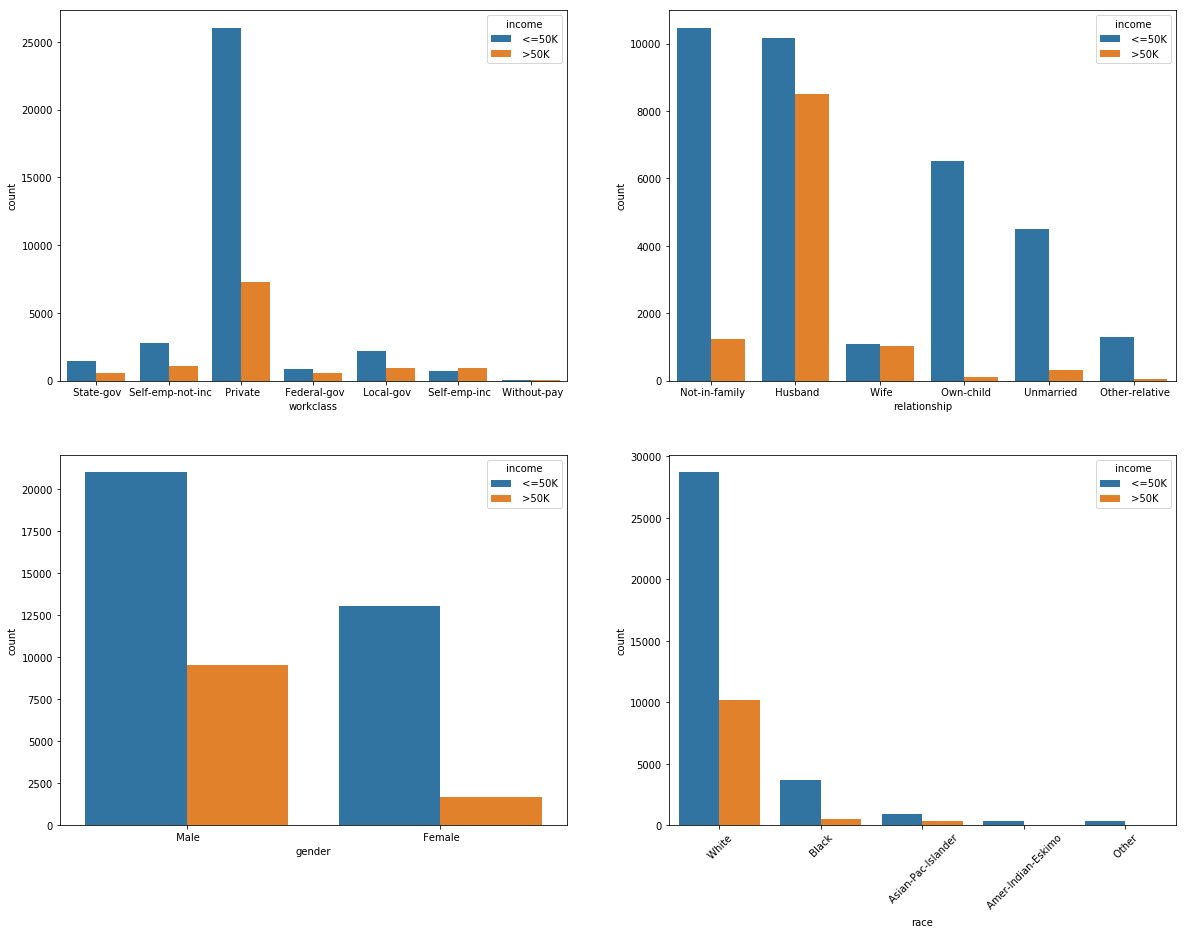

In [18]:
import seaborn as sns
fig, ((a,b),(c,d)) = plt.subplots(2,2,figsize=(20,15))
plt.xticks(rotation=45)
sns.countplot(dataset['workclass'],hue=dataset['income'],ax=a)
sns.countplot(dataset['relationship'],hue=dataset['income'],ax=b)
sns.countplot(dataset['gender'],hue=dataset['income'],ax=c)
sns.countplot(dataset['race'],hue=dataset['income'],ax=d)

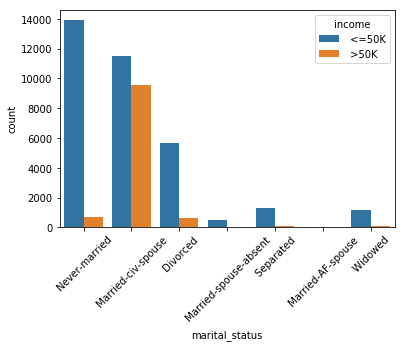

In [19]:
plt.xticks(rotation=45)
sns.countplot(dataset['marital_status'],hue=dataset['income'])

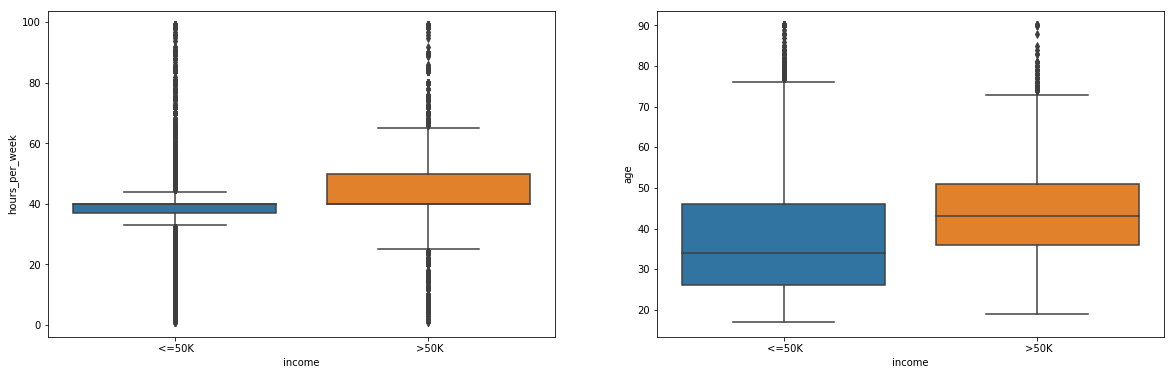

In [20]:
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='hours_per_week',x='income',data=dataset,ax=a)
sns.boxplot(y='age',x='income',data=dataset,ax=b)

# Data preprocessing

In [21]:
#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in dataset.columns:
    dataset[i]=le.fit_transform(dataset[i])

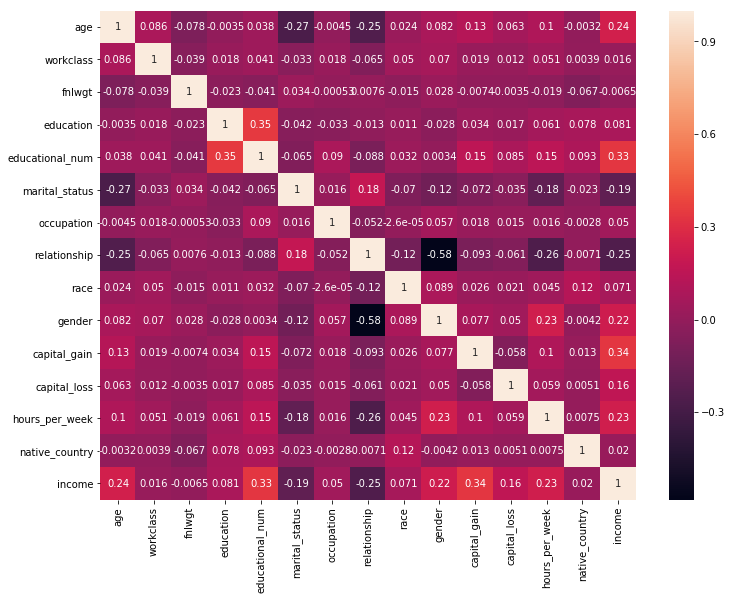

In [22]:
hmap = dataset.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap,annot=True);

In [23]:
#split the
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,14].values
X_train = X[:train.shape[0]] # Up to the last initial training set row
y_train = y[:train.shape[0]] # Up to the last initial training set row
X_test  = X[train.shape[0]:] # Past the last initial training set row
y_test  = y[train.shape[0]:] # Past the last initial training set row

In [24]:
print(X_train.shape,'**',y_train.shape,'**', X_test.shape,'**',y_test.shape)

(30162, 14) ** (30162,) ** (15060, 14) ** (15060,)


In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\mallikarjuna.m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mallikarjuna.m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mallikarjuna.m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Classification Models

# Logistic Regression

In [26]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logistic = LogisticRegression(random_state = 0)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
cm_log = confusion_matrix(y_test, y_pred)
Correct = cm_log [0,0] + cm_log [1,1]
Total =  cm_log [0,0] + cm_log [0,1]+ cm_log [1,0] + cm_log [1,1]         
Logistic_accuracy = Correct / Total
print('Logistic_Regression_Accuracy : ', Logistic_accuracy*100,'%' )

C:\Users\mallikarjuna.m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic_Regression_Accuracy :  81.83266932270917 %


# K-Nearest Neighbors (K-NN)

In [27]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
Correct = cm_knn[0,0] + cm_knn[1,1]
Total =  cm_knn[0,0] + cm_knn[0,1]+ cm_knn[1,0] + cm_knn[1,1]         
knn_accuracy = Correct / Total
print('knn_Accuracy : ', knn_accuracy*100,'%' )

knn_Accuracy :  82.78884462151395 %


# Support Vector Machine (SVM)

In [28]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred)
Correct = cm_svm [0,0] + cm_svm [1,1]
Total =  cm_svm [0,0] + cm_svm [0,1]+ cm_svm [1,0] + cm_svm [1,1]         
svm_accuracy = Correct / Total
print('svm_Accuracy : ', svm_accuracy*100,'%')

svm_Accuracy :  80.37848605577689 %


# Kernel SVM


In [29]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
ksvm = SVC(kernel = 'rbf', random_state = 0)
ksvm.fit(X_train, y_train)
y_pred = ksvm.predict(X_test)
cm_ksvm = confusion_matrix(y_test, y_pred)
Correct = cm_ksvm [0,0] + cm_ksvm [1,1]
Total =  cm_ksvm [0,0] + cm_ksvm [0,1]+ cm_ksvm [1,0] + cm_ksvm [1,1]         
ksvm_accuracy = Correct / Total
print('ksvm_Accuracy : ', ksvm_accuracy*100,'%' )

ksvm_Accuracy :  84.7011952191235 %


# Naive Bayes

In [30]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
Correct = cm[0,0] + cm[1,1]
Total =  cm[0,0] + cm[0,1]+ cm[1,0] + cm[1,1]         
nb_accuracy = Correct / Total
print('nb_Accuracy : ', nb_accuracy*100,'%' )

nb_Accuracy :  81.28818061088977 %


# Decision Tree Classification

In [31]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
Correct = cm[0,0] + cm[1,1]
Total =  cm[0,0] + cm[0,1]+ cm[1,0] + cm[1,1]         
dt_accuracy = Correct / Total
print('Decision_Tree_Accuracy : ', dt_accuracy*100,'%' )

Decision_Tree_Accuracy :  80.87649402390437 %


# Random Forest Classification

In [32]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
Correct = cm[0,0] + cm[1,1]
Total =  cm[0,0] + cm[0,1]+ cm[1,0] + cm[1,1]         
rf_accuracy = Correct / Total
print('Random_Forest_Accuracy : ', rf_accuracy*100,'%' )

Random_Forest_Accuracy :  84.32934926958832 %


# XGBoost

In [33]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
Correct = cm[0,0] + cm[1,1]
Total =  cm[0,0] + cm[0,1]+ cm[1,0] + cm[1,1]         
xgb_accuracy = Correct / Total
print('XGBoost Accuracy : ', xgb_accuracy*100,'%' )
print(cm)

XGBoost Accuracy :  86.15537848605578 %
[[10785   575]
 [ 1510  2190]]


# Visualising the Test set results

In [34]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines','Kernel Support Vector Machine', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree','XGBoost'],
    'Score': [svm_accuracy, ksvm_accuracy, knn_accuracy, Logistic_accuracy, rf_accuracy, nb_accuracy, dt_accuracy, xgb_accuracy]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.861554,XGBoost
0.847012,Kernel Support Vector Machine
0.843293,Random Forest
0.827888,KNN
0.818327,Logistic Regression
0.812882,Naive Bayes
0.808765,Decision Tree
0.803785,Support Vector Machines


# Cross Validation

In [35]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)
print(accuracies.mean()*100)
print(accuracies.std())

85.97247279281186
0.004258902229655589


The best model that predict the income @ ~86% accuracy 

# Feature Importance

In [36]:
importances = list(zip(xgb.feature_importances_, dataset.columns))
importances.sort(reverse=True)
importances

[(0.14985591, 'capital_gain'),
 (0.14985591, 'age'),
 (0.13400577, 'capital_loss'),
 (0.12391931, 'educational_num'),
 (0.093659945, 'relationship'),
 (0.0907781, 'hours_per_week'),
 (0.06916427, 'marital_status'),
 (0.06628242, 'occupation'),
 (0.0648415, 'fnlwgt'),
 (0.031700287, 'workclass'),
 (0.014409222, 'gender'),
 (0.007204611, 'race'),
 (0.0028818443, 'education'),
 (0.0014409221, 'native_country')]